# Importing Libraries and getting url

In [124]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve
from sklearn.metrics import auc, classification_report, confusion_matrix
from sklearn import tree, svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.externals.six import StringIO 
import xgboost as xgb
import pickle
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA  
from Funnky import print_metrics, find_best_k, roc, plot_feature_importances
from sklearn.linear_model import LogisticRegression
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
with open('df.pickle','rb') as file:
    fulldf=pickle.load(file)

## PCA ??? CONFUSED

In [125]:
pca = PCA()
features=fulldf.drop(columns='name')
transformed = pca.fit_transform(features)

In [126]:
# plt.scatter(transformed[:,0], transformed[:,1],hue='ty');
pca.components_
pcadict={'feat1':transformed[:,0],'feat2':transformed[:,1]}

In [127]:
pcadf=pd.DataFrame(pcadict)

In [128]:
pcadf['target']=fulldf['type']
pcadf

,feat1,feat2,target
0,11.434610,0.964248,1
1,3.384114,-0.879409,2
2,-4.623586,-1.595153,2
3,6.345836,-2.059449,2
4,3.445988,0.732524,2
5,-9.628340,-1.045052,1
6,-0.631371,-1.370067,1
7,6.361583,-2.037468,2
8,-0.487268,2.876882,2
9,6.481758,1.912625,2


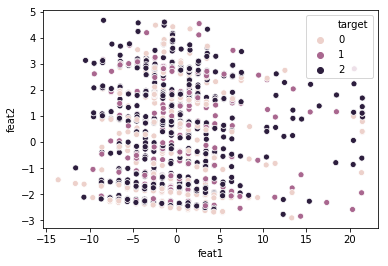

In [129]:
sns.scatterplot(x='feat1',y='feat2',hue='target',data=pcadf)

In [130]:
pca.mean_

array([1.23726346e+00, 7.83114993e-01, 2.02328967e-01, 8.60262009e-01,
       2.86026201e-01, 4.67976710e-01, 8.22416303e-01, 4.48326055e-01,
       7.93304221e-01, 9.02474527e-01, 3.57350801e-01, 7.27802038e-01,
       3.62445415e-01, 3.10043668e-01, 1.05531295e-01, 7.74381368e-01,
       2.21979622e-01, 3.11499272e-01, 6.12809316e-01, 8.51528384e-02,
       4.15574964e-01, 7.78748180e-02, 6.63027656e-01, 3.63901019e-01,
       3.15866084e-01, 1.72489083e-01, 2.44541485e-01, 8.58806405e-02,
       3.12954876e-01, 1.23726346e-01, 5.82241630e-02, 1.81222707e-01,
       1.89228530e-02, 8.00582242e-03, 4.76200873e+00, 2.63391557e+00,
       5.08151383e+00, 2.14163028e+01])

In [131]:
#put loading scores as a dataframe.apply to calculate each row

## Train Test Split

In [132]:
features=fulldf.drop(columns=['name','type'])
trainn=fulldf.drop(columns='name')
selectedfeatures=['thc','Relaxed','Hungry','Sleepy','Depression','Insomnia','Pain','Euphoric','Creative','Energetic','Dry Mouth','Nausea','Uplifted','Fatigue','Focused']
# target=label_binarize(fulldf.type,classes=[0,1,2])
target=fulldf.type
# n_classes=target.shape[1]
                    
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25,random_state=42)
trainx=X_train[selectedfeatures]
testx=X_test[selectedfeatures]

In [133]:
featurespca=pcadf.drop(columns='target')
targetpca=pcadf.target
Xptrain, Xptest, yptrain, yptest = train_test_split(featurespca, targetpca, test_size=0.25,random_state=42)

## Scale & Select Features 

In [134]:
scaler = StandardScaler()

scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

scaled_df_train = pd.DataFrame(scaled_data_train, columns=features.columns)

### Scale Selected Features:

In [11]:
scaled_data_trainsel = scaler.fit_transform(trainx)
df_test = scaler.transform(testx)

df_train = pd.DataFrame(scaled_data_trainsel, columns=trainx.columns)

## Converting types

In [12]:
for i in fulldf['type']:
    i=float(i)
relax=[]
for i in fulldf['Relaxed']:
    relax.append(float(i))

## Looking at distributions of each effect before and after scaling

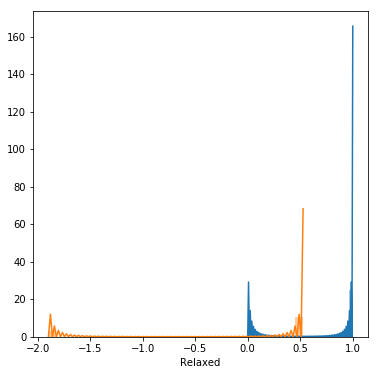

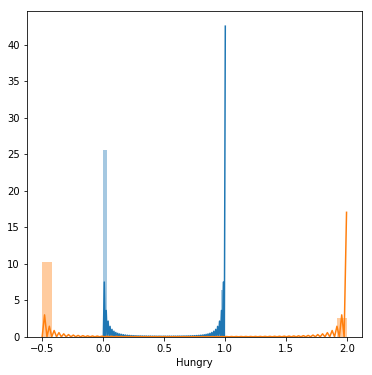

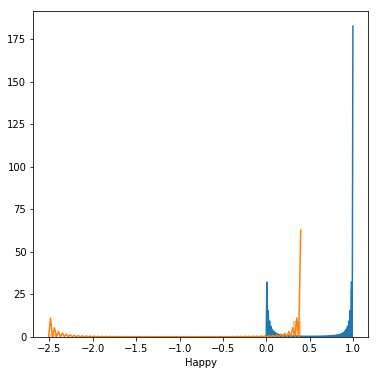

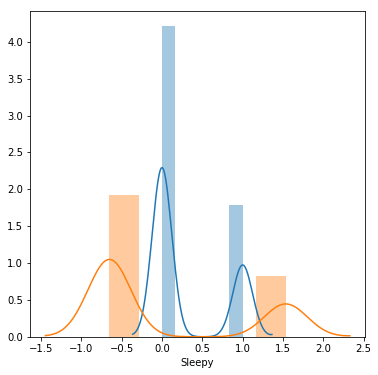

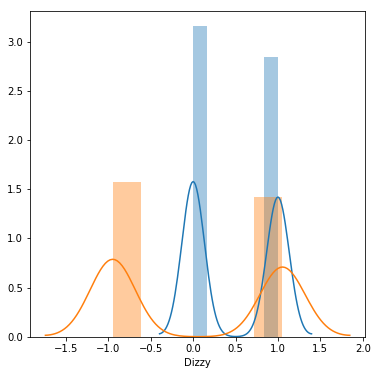

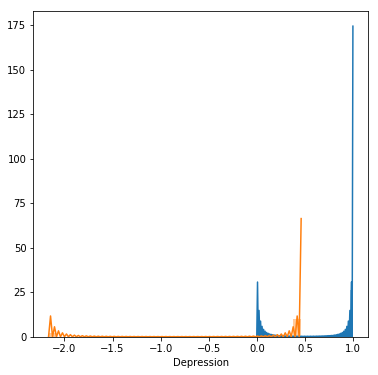

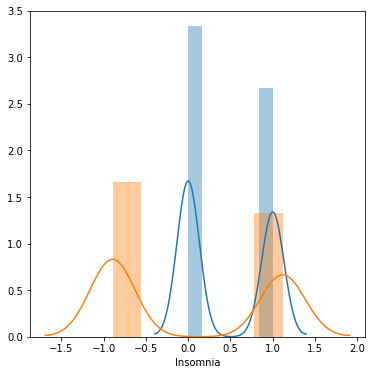

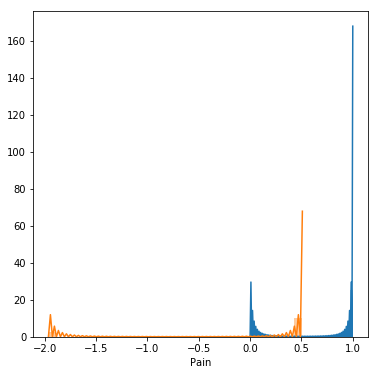

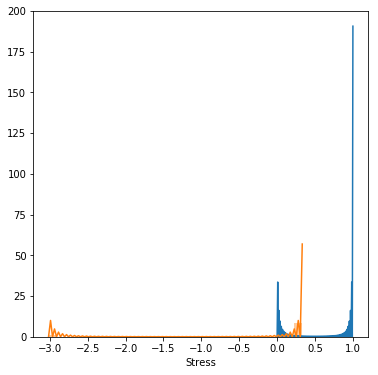

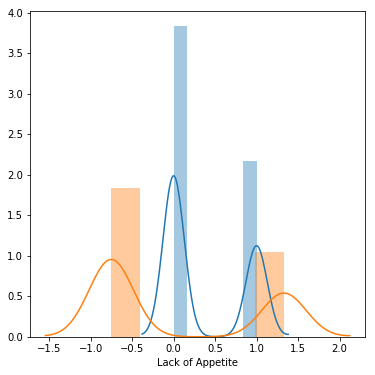

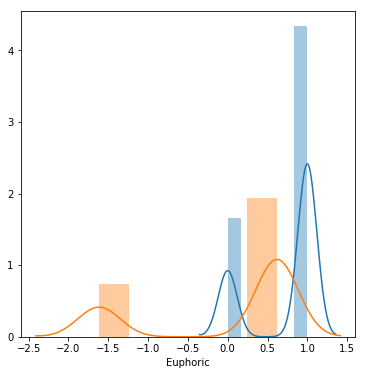

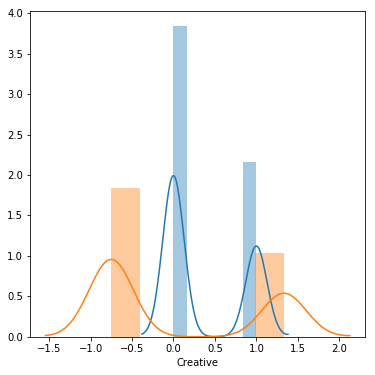

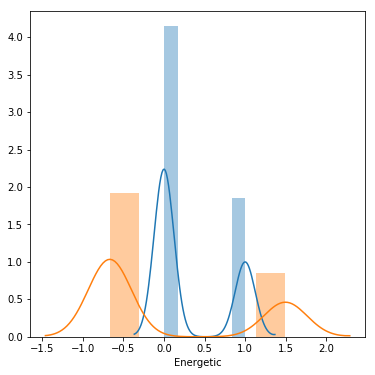

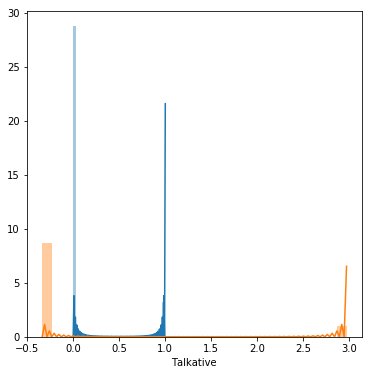

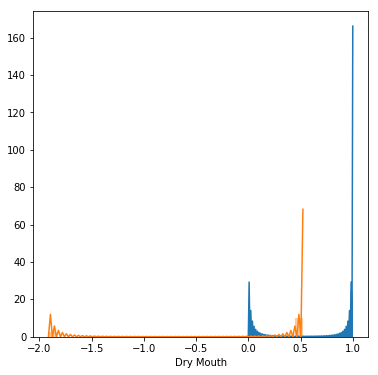

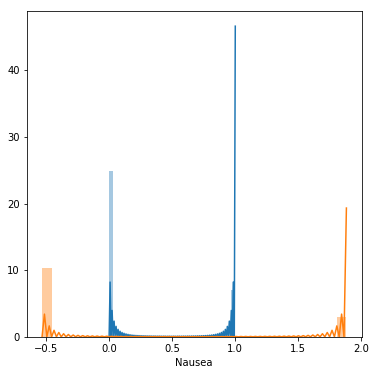

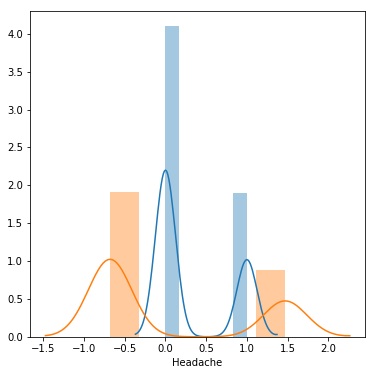

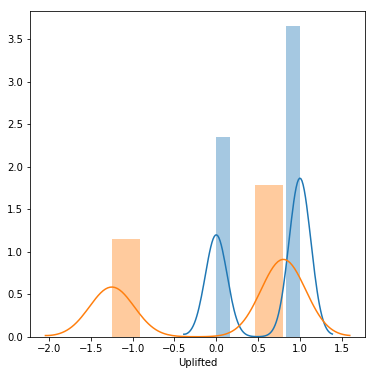

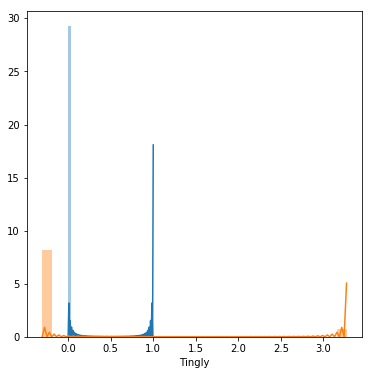

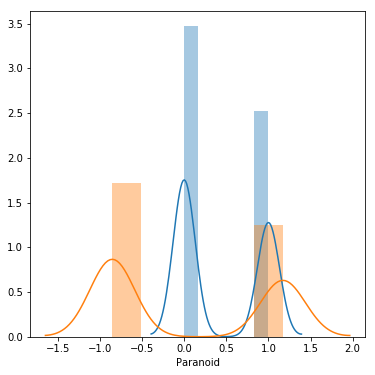

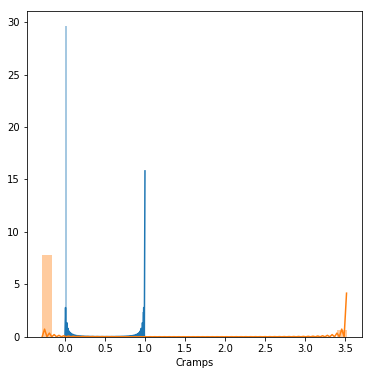

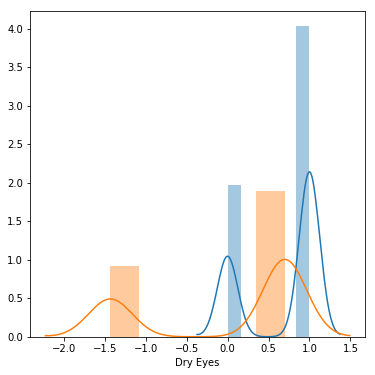

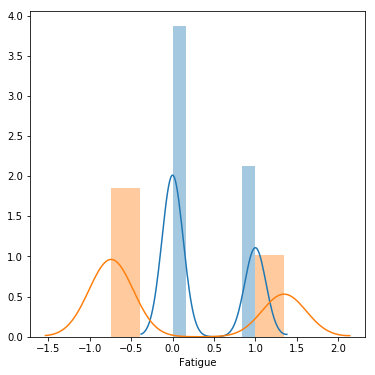

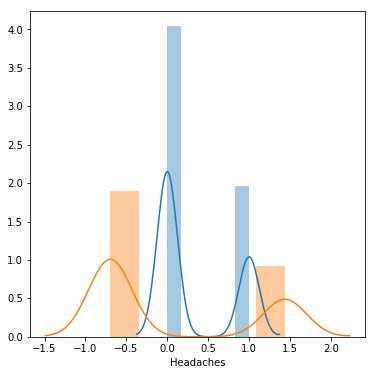

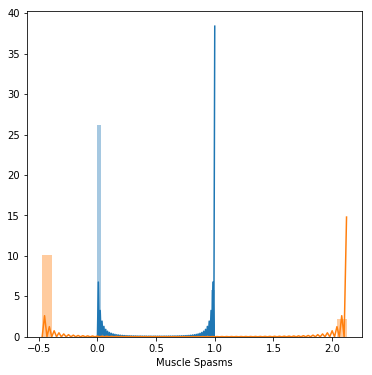

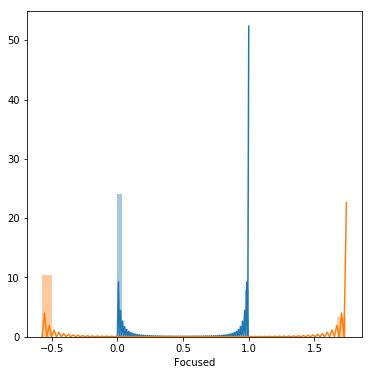

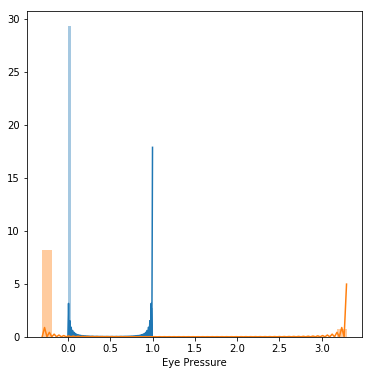

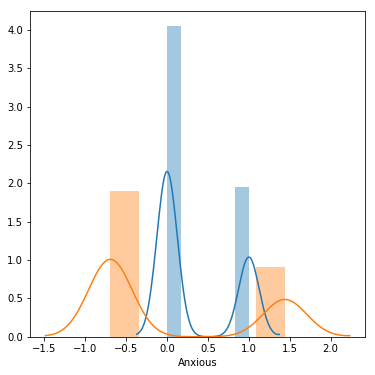

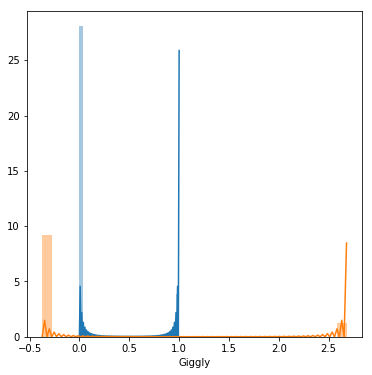

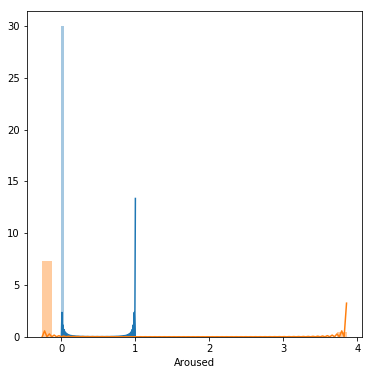

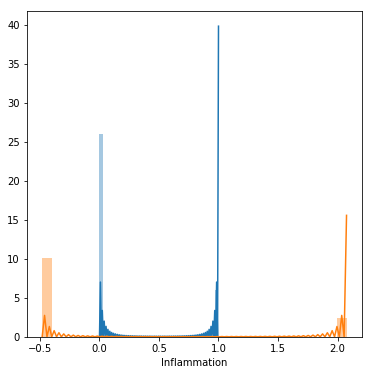

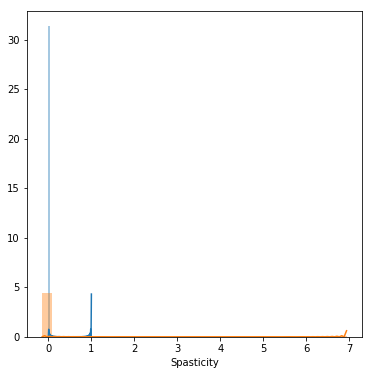

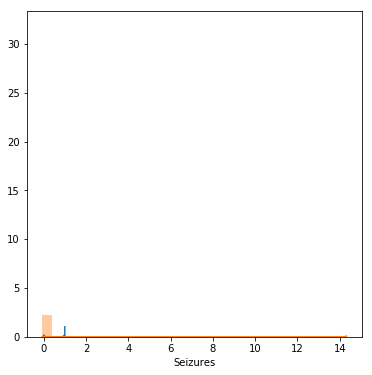

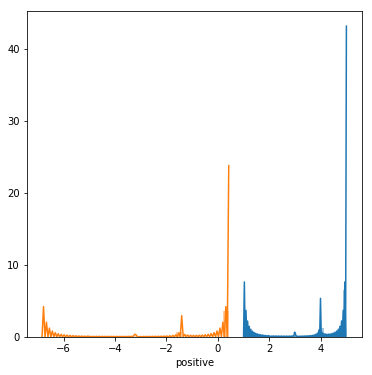

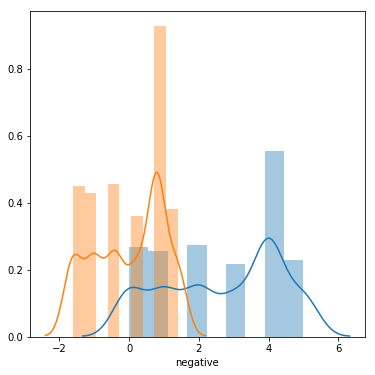

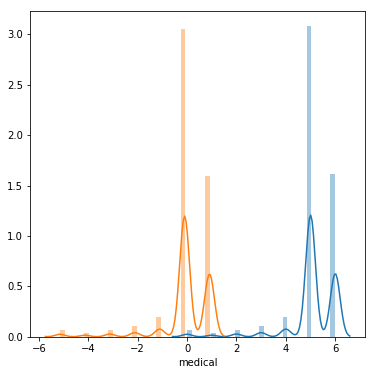

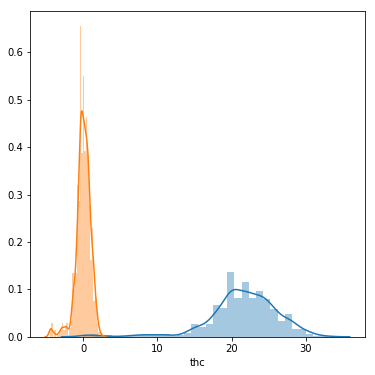

In [13]:
effects=fulldf.drop(columns=['name','type']).columns
for e in effects:
    plt.figure(figsize=(6,6))
    sns.distplot(X_train[e])
    sns.distplot(scaled_df_train[e])

# Beginning Modeling

## Baseline Model: Most probable to be hybrid, so predict all as hybrid

In [14]:
dummy = DummyClassifier(strategy='uniform', random_state=1)

dummy.fit(scaled_data_train, y_train)
basepreds=dummy.predict(scaled_data_test)
sc=dummy.score(scaled_data_test, y_test) 
print("Baseline Model Metrics:")
print_metrics(y_test,basepreds)

Baseline Model Metrics:
Precision Score: [0.272      0.11607143 0.4953271 ]
Recall Score: [0.37362637 0.24074074 0.26633166]
Accuracy Score: 0.29069767441860467
F1 Score: [0.31481481 0.15662651 0.34640523]


## Logistic Regression Model

In [15]:
logreg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial') #Starter code
# Your code here
model_log = logreg.fit(scaled_data_train, y_train)
model_log

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [103]:
y_hat_test = logreg.predict(scaled_data_test)
y_hat_train = logreg.predict(scaled_data_train)
residuals = y_train - y_hat_train
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

 0    675
-1    114
-2     90
 2     83
 1     68
Name: type, dtype: int64
 0    0.655340
-1    0.110680
-2    0.087379
 2    0.080583
 1    0.066019
Name: type, dtype: float64


In [17]:
mat=confusion_matrix(y_hat_test,y_test)

In [18]:
ps=[]
i=0.0
for x in range(0,10):
    i+=0.1
    ps.append(i)

In [19]:
ps

[0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6,
 0.7,
 0.7999999999999999,
 0.8999999999999999,
 0.9999999999999999]

In [20]:
logittpr,logitfpr=[],[]
for p in ps:
    mat=confusion_matrix(y_hat_test,y_test)
    logittpr.append(mat[0][0]+mat[1][1]+mat[2][2])

## KNN Base Model

In [21]:
clf1 = KNeighborsClassifier()
clf1.fit(scaled_data_train, y_train)
test_preds = clf1.predict(scaled_data_test)
print_metrics(y_test, test_preds)
print(classification_report(y_test,test_preds,target_names=['indica','satica','hybrid']))

Precision Score: [0.49565217 0.4516129  0.67664671]
Recall Score: [0.62637363 0.51851852 0.5678392 ]
Accuracy Score: 0.5755813953488372
F1 Score: [0.55339806 0.48275862 0.61748634]
              precision    recall  f1-score   support

      indica       0.50      0.63      0.55        91
      satica       0.45      0.52      0.48        54
      hybrid       0.68      0.57      0.62       199

   micro avg       0.58      0.58      0.58       344
   macro avg       0.54      0.57      0.55       344
weighted avg       0.59      0.58      0.58       344



### With Selected Features:

In [22]:
clf1 = KNeighborsClassifier()
clf1.fit(df_train, y_train)
test_preds = clf1.predict(df_test)
print_metrics(y_test, test_preds)
print(classification_report(y_test,test_preds,target_names=['indica','satica','hybrid']))
confusion_matrix(test_preds,y_test)

Precision Score: [0.57142857 0.41791045 0.68156425]
Recall Score: [0.61538462 0.51851852 0.61306533]
Accuracy Score: 0.5988372093023255
F1 Score: [0.59259259 0.46280992 0.64550265]
              precision    recall  f1-score   support

      indica       0.57      0.62      0.59        91
      satica       0.42      0.52      0.46        54
      hybrid       0.68      0.61      0.65       199

   micro avg       0.60      0.60      0.60       344
   macro avg       0.56      0.58      0.57       344
weighted avg       0.61      0.60      0.60       344



array([[ 56,   2,  40],
       [  2,  28,  37],
       [ 33,  24, 122]])

### With PCA

In [135]:
clf1 = KNeighborsClassifier()
clf1.fit(Xptrain, yptrain)
test_preds = clf1.predict(Xptest)
print_metrics(yptest, test_preds)
print(classification_report(yptest,test_preds,target_names=['indica','satica','hybrid']))
confusion_matrix(test_preds,yptest)

Precision Score: [0.3559322  0.20833333 0.62359551]
Recall Score: [0.46153846 0.18518519 0.55778894]
Accuracy Score: 0.4738372093023256
F1 Score: [0.40191388 0.19607843 0.58885942]
              precision    recall  f1-score   support

      indica       0.36      0.46      0.40        91
      satica       0.21      0.19      0.20        54
      hybrid       0.62      0.56      0.59       199

   micro avg       0.47      0.47      0.47       344
   macro avg       0.40      0.40      0.40       344
weighted avg       0.49      0.47      0.48       344



array([[ 42,  17,  59],
       [  9,  10,  29],
       [ 40,  27, 111]])

## Getting best KNN model

In [23]:
find_best_k(scaled_data_train, y_train, scaled_data_test, y_test)

Best Value for k: 19
Accuracy: 0.6686046511627907


In [24]:
clf1 = KNeighborsClassifier(n_neighbors=19)
clf1.fit(scaled_data_train, y_train)
test_preds = clf1.predict(scaled_data_test)
print_metrics(y_test, test_preds)
print(classification_report(y_test,test_preds,target_names=['indica','satica','hybrid']))

Precision Score: [0.60869565 0.66666667 0.69406393]
Recall Score: [0.61538462 0.40740741 0.7638191 ]
Accuracy Score: 0.6686046511627907
F1 Score: [0.61202186 0.50574713 0.72727273]
              precision    recall  f1-score   support

      indica       0.61      0.62      0.61        91
      satica       0.67      0.41      0.51        54
      hybrid       0.69      0.76      0.73       199

   micro avg       0.67      0.67      0.67       344
   macro avg       0.66      0.60      0.62       344
weighted avg       0.67      0.67      0.66       344



### With Selected Features:

In [25]:
find_best_k(df_train, y_train, df_test, y_test)

Best Value for k: 17
Accuracy: 0.6627906976744186


In [26]:
clf1 = KNeighborsClassifier(n_neighbors=17)
clf1.fit(df_train, y_train)
test_preds = clf1.predict(df_test)
print_metrics(y_test, test_preds)
dt_cv_score=cross_val_score(clf1, df_train, y_train)
meandtcv=dt_cv_score.mean()
print("Mean Cross Validation Score: {:.4}%".format(meandtcv * 100))
print(classification_report(y_test,test_preds,target_names=['indica','satica','hybrid']))

Precision Score: [0.61956522 0.53030303 0.7311828 ]
Recall Score: [0.62637363 0.64814815 0.68341709]
Accuracy Score: 0.6627906976744186
F1 Score: [0.62295082 0.58333333 0.70649351]
Mean Cross Validation Score: 60.97%
              precision    recall  f1-score   support

      indica       0.62      0.63      0.62        91
      satica       0.53      0.65      0.58        54
      hybrid       0.73      0.68      0.71       199

   micro avg       0.66      0.66      0.66       344
   macro avg       0.63      0.65      0.64       344
weighted avg       0.67      0.66      0.67       344



### With PCA

In [136]:
find_best_k(Xptrain, yptrain, Xptest, yptest)

Best Value for k: 19
Accuracy: 0.5319767441860465


In [137]:
clf1 = KNeighborsClassifier(n_neighbors=19)
clf1.fit(Xptrain, yptrain)
test_preds = clf1.predict(Xptest)
print_metrics(yptest, test_preds)
dt_cv_score=cross_val_score(clf1, Xptrain, yptrain)
meandtcv=dt_cv_score.mean()
print("Mean Cross Validation Score: {:.4}%".format(meandtcv * 100))
print(classification_report(yptest,test_preds,target_names=['indica','satica','hybrid']))

Precision Score: [0.28571429 0.25       0.57931034]
Recall Score: [0.13186813 0.05555556 0.84422111]
Accuracy Score: 0.5319767441860465
F1 Score: [0.18045113 0.09090909 0.68711656]
Mean Cross Validation Score: 45.82%
              precision    recall  f1-score   support

      indica       0.29      0.13      0.18        91
      satica       0.25      0.06      0.09        54
      hybrid       0.58      0.84      0.69       199

   micro avg       0.53      0.53      0.53       344
   macro avg       0.37      0.34      0.32       344
weighted avg       0.45      0.53      0.46       344



In [138]:
model=KNeighborsClassifier()

### Grid Search with KNN: All Features

In [139]:
dt_cv_score=cross_val_score(model, scaled_data_train, y_train)
meandtcv=dt_cv_score.mean()
print("Mean Cross Validation Score: {:.4}%".format(meandtcv * 100))

dt_param_grid = {
    'n_neighbors':list(range(1,31)),
    'weights':['uniform','distance']
}

dt_grid_search = GridSearchCV(model, dt_param_grid, cv=10, return_train_score=True)
dt_grid_search.fit(scaled_data_train, y_train)

dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(scaled_data_test, y_test)

print("Mean Training Score: {:.4}%".format(dt_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(dt_gs_testing_score * 100))
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_


Mean Cross Validation Score: 55.54%
Mean Training Score: 83.82%
Mean Testing Score: 65.99%
Best Parameter Combination Found During Grid Search:


{'n_neighbors': 26, 'weights': 'uniform'}

In [140]:
clf1 = KNeighborsClassifier(n_neighbors=26, weights='uniform')
clf1.fit(scaled_data_train, y_train)
test_preds = clf1.predict(scaled_data_test)
print_metrics(y_test, test_preds)
dt_cv_score=cross_val_score(clf1, scaled_data_train, y_train)
meandtcv=dt_cv_score.mean()
print("Mean Cross Validation Score: {:.4}%".format(meandtcv * 100))
print(classification_report(y_test,test_preds,target_names=['indica','satica','hybrid']))

Precision Score: [0.6        0.61538462 0.6952381 ]
Recall Score: [0.62637363 0.44444444 0.73366834]
Accuracy Score: 0.6598837209302325
F1 Score: [0.61290323 0.51612903 0.71393643]
Mean Cross Validation Score: 61.36%
              precision    recall  f1-score   support

      indica       0.60      0.63      0.61        91
      satica       0.62      0.44      0.52        54
      hybrid       0.70      0.73      0.71       199

   micro avg       0.66      0.66      0.66       344
   macro avg       0.64      0.60      0.61       344
weighted avg       0.66      0.66      0.66       344



#### KNN Grid Search Selected Features

In [141]:
dt_cv_score=cross_val_score(model, df_train, y_train)
meandtcv=dt_cv_score.mean()
print("Mean Cross Validation Score: {:.4}%".format(meandtcv * 100))

dt_param_grid = {
    'n_neighbors':list(range(1,31)),
    'weights':['uniform','distance']
}

dt_grid_search = GridSearchCV(model, dt_param_grid, cv=10, return_train_score=True)
dt_grid_search.fit(df_train, y_train)

dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(df_test, y_test)

print("Mean Training Score: {:.4}%".format(dt_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(dt_gs_testing_score * 100))
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Cross Validation Score: 55.83%
Mean Training Score: 82.72%
Mean Testing Score: 66.28%
Best Parameter Combination Found During Grid Search:


{'n_neighbors': 26, 'weights': 'uniform'}

In [142]:
clf1 = KNeighborsClassifier(n_neighbors=26)
clf1.fit(df_train, y_train)
test_preds = clf1.predict(df_test)
print_metrics(y_test, test_preds)
dt_cv_score=cross_val_score(clf1, df_train, y_train)
meandtcv=dt_cv_score.mean()
print("Mean Cross Validation Score: {:.4}%".format(meandtcv * 100))
print(classification_report(y_test,test_preds,target_names=['indica','satica','hybrid']))

Precision Score: [0.63218391 0.52941176 0.70873786]
Recall Score: [0.6043956  0.5        0.73366834]
Accuracy Score: 0.6627906976744186
F1 Score: [0.61797753 0.51428571 0.72098765]
Mean Cross Validation Score: 62.53%
              precision    recall  f1-score   support

      indica       0.63      0.60      0.62        91
      satica       0.53      0.50      0.51        54
      hybrid       0.71      0.73      0.72       199

   micro avg       0.66      0.66      0.66       344
   macro avg       0.62      0.61      0.62       344
weighted avg       0.66      0.66      0.66       344



### KNN Grid Search PCA

In [143]:
dt_cv_score=cross_val_score(model, Xptrain, yptrain)
meandtcv=dt_cv_score.mean()
print("Mean Cross Validation Score: {:.4}%".format(meandtcv * 100))

dt_param_grid = {
    'n_neighbors':list(range(1,31)),
    'weights':['uniform','distance']
}

dt_grid_search = GridSearchCV(model, dt_param_grid, cv=10, return_train_score=True)
dt_grid_search.fit(Xptrain, yptrain)

dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(Xptest, yptest)

print("Mean Training Score: {:.4}%".format(dt_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(dt_gs_testing_score * 100))
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Cross Validation Score: 44.18%
Mean Training Score: 78.8%
Mean Testing Score: 50.87%
Best Parameter Combination Found During Grid Search:


{'n_neighbors': 10, 'weights': 'uniform'}

In [145]:
clf1 = KNeighborsClassifier(n_neighbors=10)
clf1.fit(Xptrain, yptrain)
test_preds = clf1.predict(Xptest)
print_metrics(yptest, test_preds)
dt_cv_score=cross_val_score(clf1, Xptrain, yptrain)
meandtcv=dt_cv_score.mean()
print("Mean Cross Validation Score: {:.4}%".format(meandtcv * 100))
print(classification_report(yptest,test_preds,target_names=['indica','satica','hybrid']))

Precision Score: [0.3875     0.16666667 0.60526316]
Recall Score: [0.34065934 0.11111111 0.69346734]
Accuracy Score: 0.5087209302325582
F1 Score: [0.3625731  0.13333333 0.64637002]
Mean Cross Validation Score: 45.44%
              precision    recall  f1-score   support

      indica       0.39      0.34      0.36        91
      satica       0.17      0.11      0.13        54
      hybrid       0.61      0.69      0.65       199

   micro avg       0.51      0.51      0.51       344
   macro avg       0.39      0.38      0.38       344
weighted avg       0.48      0.51      0.49       344



## Decision Tree

### Baseline Decision Tree

In [146]:
# !pip install dtreeplt

In [147]:
classifier1 = DecisionTreeClassifier()  
classifier1.fit(scaled_data_train, y_train) 
y_pred = classifier1.predict(scaled_data_test)

In [148]:
# tree.export_graphviz(classifier1) 
# from dtreeplt import dtreeplt
# plt.figure(figsize=(20,20))
# dtree = dtreeplt(
#     model=classifier1,
#     feature_names=features.columns,
#     target_names=fulldf['type']
# )
# fig = dtree.view()
# fig.savefig('DT1.png')

In [149]:
y_score = classifier1.score(scaled_data_test, y_test)
print('Accuracy: ', y_score)

# Compute the average precision score
micro_precision = precision_score(y_pred, y_test, average='micro')
print('Micro-averaged precision score: {0:0.2f}'.format(
      micro_precision))

macro_precision = precision_score(y_pred, y_test, average='macro')
print('Macro-averaged precision score: {0:0.2f}'.format(
      macro_precision))

per_class_precision = precision_score(y_pred, y_test, average=None)
print('Per-class precision score:', per_class_precision)
print_metrics(y_test,y_pred)
print(classification_report(y_test,y_pred,target_names=['indica','satica','hybrid']))
# roc(classifier1,scaled_data_train,scaled_data_test,y_train,y_test,n_classes)

Accuracy:  0.5319767441860465
Micro-averaged precision score: 0.53
Macro-averaged precision score: 0.56
Per-class precision score: [0.59340659 0.61111111 0.48241206]
Precision Score: [0.5        0.37078652 0.65306122]
Recall Score: [0.59340659 0.61111111 0.48241206]
Accuracy Score: 0.5319767441860465
F1 Score: [0.54271357 0.46153846 0.55491329]
              precision    recall  f1-score   support

      indica       0.50      0.59      0.54        91
      satica       0.37      0.61      0.46        54
      hybrid       0.65      0.48      0.55       199

   micro avg       0.53      0.53      0.53       344
   macro avg       0.51      0.56      0.52       344
weighted avg       0.57      0.53      0.54       344



### With Selected Features:

In [150]:
classifier1 = DecisionTreeClassifier()  
classifier1.fit(df_train, y_train) 
y_pred = classifier1.predict(df_test)

In [151]:
y_score = classifier1.score(df_test, y_test)
print('Accuracy: ', y_score)

# Compute the average precision score
micro_precision = precision_score(y_pred, y_test, average='micro')
print('Micro-averaged precision score: {0:0.2f}'.format(
      micro_precision))

macro_precision = precision_score(y_pred, y_test, average='macro')
print('Macro-averaged precision score: {0:0.2f}'.format(
      macro_precision))

per_class_precision = precision_score(y_pred, y_test, average=None)
print('Per-class precision score:', per_class_precision)
print_metrics(y_test,y_pred)
print(classification_report(y_test,y_pred,target_names=['indica','satica','hybrid']))
# roc(classifier1,df_train,df_test,y_train,y_test,n_classes)

Accuracy:  0.5290697674418605
Micro-averaged precision score: 0.53
Macro-averaged precision score: 0.57
Per-class precision score: [0.54945055 0.66666667 0.48241206]
Precision Score: [0.51020408 0.375      0.64      ]
Recall Score: [0.54945055 0.66666667 0.48241206]
Accuracy Score: 0.5290697674418605
F1 Score: [0.52910053 0.48       0.55014327]
              precision    recall  f1-score   support

      indica       0.51      0.55      0.53        91
      satica       0.38      0.67      0.48        54
      hybrid       0.64      0.48      0.55       199

   micro avg       0.53      0.53      0.53       344
   macro avg       0.51      0.57      0.52       344
weighted avg       0.56      0.53      0.53       344



### With PCA

In [152]:
classifier1.fit(Xptrain, yptrain) 
y_pred = classifier1.predict(Xptest)

In [153]:
y_score = classifier1.score(Xptest, yptest)
print('Accuracy: ', y_score)

# Compute the average precision score
micro_precision = precision_score(y_pred, yptest, average='micro')
print('Micro-averaged precision score: {0:0.2f}'.format(
      micro_precision))

macro_precision = precision_score(y_pred, yptest, average='macro')
print('Macro-averaged precision score: {0:0.2f}'.format(
      macro_precision))

per_class_precision = precision_score(y_pred, yptest, average=None)
print('Per-class precision score:', per_class_precision)
print_metrics(yptest,y_pred)
print(classification_report(yptest,y_pred,target_names=['indica','satica','hybrid']))
# roc(classifier1,df_train,df_test,y_train,y_test,n_classes)

Accuracy:  0.48255813953488375
Micro-averaged precision score: 0.48
Macro-averaged precision score: 0.41
Per-class precision score: [0.37362637 0.25925926 0.59296482]
Precision Score: [0.3655914  0.19444444 0.65921788]
Recall Score: [0.37362637 0.25925926 0.59296482]
Accuracy Score: 0.48255813953488375
F1 Score: [0.36956522 0.22222222 0.62433862]
              precision    recall  f1-score   support

      indica       0.37      0.37      0.37        91
      satica       0.19      0.26      0.22        54
      hybrid       0.66      0.59      0.62       199

   micro avg       0.48      0.48      0.48       344
   macro avg       0.41      0.41      0.41       344
weighted avg       0.51      0.48      0.49       344



## Decision Tree with random state=10

In [154]:
classifier2 = DecisionTreeClassifier(random_state=10)  
classifier2.fit(scaled_data_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [155]:
y_pred = classifier2.predict(scaled_data_test)

In [156]:
y_score = classifier2.score(scaled_data_test, y_test)
print('Accuracy: ', y_score)

micro_precision = precision_score(y_pred, y_test, average='micro')
print('Micro-averaged precision score: {0:0.2f}'.format(
      micro_precision))

macro_precision = precision_score(y_pred, y_test, average='macro')
print('Macro-averaged precision score: {0:0.2f}'.format(
      macro_precision))

per_class_precision = precision_score(y_pred, y_test, average=None)
print('Per-class precision score:', per_class_precision)

print_metrics(y_test,y_pred)
print(classification_report(y_test,y_pred,target_names=['indica','satica','hybrid']))
# roc(classifier2,scaled_data_train,scaled_data_test,y_train,y_test,n_classes)

Accuracy:  0.5377906976744186
Micro-averaged precision score: 0.54
Macro-averaged precision score: 0.56
Per-class precision score: [0.58241758 0.61111111 0.49748744]
Precision Score: [0.47747748 0.40243902 0.65562914]
Recall Score: [0.58241758 0.61111111 0.49748744]
Accuracy Score: 0.5377906976744186
F1 Score: [0.52475248 0.48529412 0.56571429]
              precision    recall  f1-score   support

      indica       0.48      0.58      0.52        91
      satica       0.40      0.61      0.49        54
      hybrid       0.66      0.50      0.57       199

   micro avg       0.54      0.54      0.54       344
   macro avg       0.51      0.56      0.53       344
weighted avg       0.57      0.54      0.54       344



### With Selected Features:

In [157]:
classifier2 = DecisionTreeClassifier(random_state=10)  
classifier2.fit(df_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [158]:
y_pred = classifier2.predict(df_test)
y_score = classifier2.score(df_test, y_test)
print('Accuracy: ', y_score)

micro_precision = precision_score(y_pred, y_test, average='micro')
print('Micro-averaged precision score: {0:0.2f}'.format(
      micro_precision))

macro_precision = precision_score(y_pred, y_test, average='macro')
print('Macro-averaged precision score: {0:0.2f}'.format(
      macro_precision))

per_class_precision = precision_score(y_pred, y_test, average=None)
print('Per-class precision score:', per_class_precision)

print_metrics(y_test,y_pred)
print(classification_report(y_test,y_pred,target_names=['indica','satica','hybrid']))
# roc(classifier2,df_train,df_test,y_train,y_test,n_classes)

Accuracy:  0.5436046511627907
Micro-averaged precision score: 0.54
Macro-averaged precision score: 0.57
Per-class precision score: [0.53846154 0.66666667 0.51256281]
Precision Score: [0.51578947 0.39130435 0.64968153]
Recall Score: [0.53846154 0.66666667 0.51256281]
Accuracy Score: 0.5436046511627907
F1 Score: [0.52688172 0.49315068 0.57303371]
              precision    recall  f1-score   support

      indica       0.52      0.54      0.53        91
      satica       0.39      0.67      0.49        54
      hybrid       0.65      0.51      0.57       199

   micro avg       0.54      0.54      0.54       344
   macro avg       0.52      0.57      0.53       344
weighted avg       0.57      0.54      0.55       344



### With PCA

In [160]:
classifier2.fit(Xptrain, yptrain) 
y_pred = classifier2.predict(Xptest)
y_score = classifier2.score(Xptest, yptest)
print('Accuracy: ', y_score)

micro_precision = precision_score(y_pred, yptest, average='micro')
print('Micro-averaged precision score: {0:0.2f}'.format(
      micro_precision))

macro_precision = precision_score(y_pred, yptest, average='macro')
print('Macro-averaged precision score: {0:0.2f}'.format(
      macro_precision))

per_class_precision = precision_score(y_pred, yptest, average=None)
print('Per-class precision score:', per_class_precision)

print_metrics(y_test,y_pred)
print(classification_report(yptest,y_pred,target_names=['indica','satica','hybrid']))
# roc(classifier2,df_train,df_test,y_train,y_test,n_classes)

Accuracy:  0.4680232558139535
Micro-averaged precision score: 0.47
Macro-averaged precision score: 0.41
Per-class precision score: [0.3956044  0.2962963  0.54773869]
Precision Score: [0.35643564 0.21917808 0.64117647]
Recall Score: [0.3956044  0.2962963  0.54773869]
Accuracy Score: 0.4680232558139535
F1 Score: [0.375      0.2519685  0.59078591]
              precision    recall  f1-score   support

      indica       0.36      0.40      0.37        91
      satica       0.22      0.30      0.25        54
      hybrid       0.64      0.55      0.59       199

   micro avg       0.47      0.47      0.47       344
   macro avg       0.41      0.41      0.41       344
weighted avg       0.50      0.47      0.48       344



## Decision Tree using entropy and random state=10

In [161]:
classifier3 = DecisionTreeClassifier(criterion='entropy',random_state=10)  
classifier3.fit(scaled_data_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [162]:
y_pred = classifier3.predict(scaled_data_test)

acc = accuracy_score(y_test,y_pred)
print("Accuracy is: {}".format(acc))

micro_precision = precision_score(y_pred, y_test, average='micro')
print('Micro-averaged precision score: {0:0.2f}'.format(
      micro_precision))

macro_precision = precision_score(y_pred, y_test, average='macro')
print('Macro-averaged precision score: {0:0.2f}'.format(
      macro_precision))

per_class_precision = precision_score(y_pred, y_test, average=None)
print('Per-class precision score:', per_class_precision)
print_metrics(y_test,y_pred)
print(classification_report(y_test,y_pred,target_names=['indica','satica','hybrid']))
# roc(classifier3,scaled_data_train,scaled_data_test,y_train,y_test,n_classes)

Accuracy is: 0.5755813953488372
Micro-averaged precision score: 0.58
Macro-averaged precision score: 0.61
Per-class precision score: [0.63736264 0.66666667 0.52261307]
Precision Score: [0.51785714 0.42857143 0.7027027 ]
Recall Score: [0.63736264 0.66666667 0.52261307]
Accuracy Score: 0.5755813953488372
F1 Score: [0.57142857 0.52173913 0.59942363]
              precision    recall  f1-score   support

      indica       0.52      0.64      0.57        91
      satica       0.43      0.67      0.52        54
      hybrid       0.70      0.52      0.60       199

   micro avg       0.58      0.58      0.58       344
   macro avg       0.55      0.61      0.56       344
weighted avg       0.61      0.58      0.58       344



### With Selected Features:

In [163]:
classifier3 = DecisionTreeClassifier(criterion='entropy',random_state=10)  
classifier3.fit(df_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [164]:
y_pred = classifier3.predict(df_test)

acc = accuracy_score(y_test,y_pred)
print("Accuracy is: {}".format(acc))

micro_precision = precision_score(y_pred, y_test, average='micro')
print('Micro-averaged precision score: {0:0.2f}'.format(
      micro_precision))

macro_precision = precision_score(y_pred, y_test, average='macro')
print('Macro-averaged precision score: {0:0.2f}'.format(
      macro_precision))

per_class_precision = precision_score(y_pred, y_test, average=None)
print('Per-class precision score:', per_class_precision)
print_metrics(y_test,y_pred)
print(classification_report(y_test,y_pred,target_names=['indica','satica','hybrid']))
# roc(classifier3,df_train,df_test,y_train,y_test,n_classes)

Accuracy is: 0.5261627906976745
Micro-averaged precision score: 0.53
Macro-averaged precision score: 0.57
Per-class precision score: [0.59340659 0.66666667 0.45728643]
Precision Score: [0.52941176 0.34951456 0.65467626]
Recall Score: [0.59340659 0.66666667 0.45728643]
Accuracy Score: 0.5261627906976745
F1 Score: [0.55958549 0.45859873 0.53846154]
              precision    recall  f1-score   support

      indica       0.53      0.59      0.56        91
      satica       0.35      0.67      0.46        54
      hybrid       0.65      0.46      0.54       199

   micro avg       0.53      0.53      0.53       344
   macro avg       0.51      0.57      0.52       344
weighted avg       0.57      0.53      0.53       344



### With PCA

In [166]:
classifier3.fit(Xptrain, yptrain) 
y_pred = classifier3.predict(Xptest)

acc = accuracy_score(yptest,y_pred)
print("Accuracy is: {}".format(acc))

micro_precision = precision_score(y_pred, yptest, average='micro')
print('Micro-averaged precision score: {0:0.2f}'.format(
      micro_precision))

macro_precision = precision_score(y_pred, yptest, average='macro')
print('Macro-averaged precision score: {0:0.2f}'.format(
      macro_precision))

per_class_precision = precision_score(y_pred, yptest, average=None)
print('Per-class precision score:', per_class_precision)
print_metrics(yptest,y_pred)
print(classification_report(yptest,y_pred,target_names=['indica','satica','hybrid']))
# roc(classifier3,df_train,df_test,y_train,y_test,n_classes)

Accuracy is: 0.4738372093023256
Micro-averaged precision score: 0.47
Macro-averaged precision score: 0.41
Per-class precision score: [0.41758242 0.24074074 0.56281407]
Precision Score: [0.37254902 0.19402985 0.64      ]
Recall Score: [0.41758242 0.24074074 0.56281407]
Accuracy Score: 0.4738372093023256
F1 Score: [0.39378238 0.21487603 0.59893048]
              precision    recall  f1-score   support

      indica       0.37      0.42      0.39        91
      satica       0.19      0.24      0.21        54
      hybrid       0.64      0.56      0.60       199

   micro avg       0.47      0.47      0.47       344
   macro avg       0.40      0.41      0.40       344
weighted avg       0.50      0.47      0.48       344



In [165]:
#Still need to get F1, Recall, and Decision Tree visualization!!!

## Grid Search with Decision Tree: All Features

In [167]:
model=DecisionTreeClassifier()
dt_cv_score=cross_val_score(model, scaled_data_train, y_train)
meandtcv=dt_cv_score.mean()
print("Mean Cross Validation Score: {:.4}%".format(meandtcv * 100))

dt_param_grid = {
    'criterion':['entropy','gini'],
    'max_depth':[None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]   
}

dt_grid_search = GridSearchCV(model, dt_param_grid, cv=10, return_train_score=True)
dt_grid_search.fit(scaled_data_train, y_train)

dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(scaled_data_test, y_test)

print("Mean Training Score: {:.4}%".format(dt_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(dt_gs_testing_score * 100))
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Cross Validation Score: 51.85%
Mean Training Score: 68.29%
Mean Testing Score: 65.7%
Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [168]:
classifier3 = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_leaf=4,min_samples_split=2)  
classifier3.fit(scaled_data_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [50]:
y_pred = classifier3.predict(scaled_data_test)

acc = accuracy_score(y_test,y_pred)
print("Accuracy is: {}".format(acc))

micro_precision = precision_score(y_pred, y_test, average='micro')
print('Micro-averaged precision score: {0:0.2f}'.format(
      micro_precision))

macro_precision = precision_score(y_pred, y_test, average='macro')
print('Macro-averaged precision score: {0:0.2f}'.format(
      macro_precision))

per_class_precision = precision_score(y_pred, y_test, average=None)
print('Per-class precision score:', per_class_precision)
print_metrics(y_test,y_pred)
print(classification_report(y_test,y_pred,target_names=['indica','satica','hybrid']))
# roc(classifier3,scaled_data_train,scaled_data_test,y_train,y_test,n_classes)

Accuracy is: 0.6569767441860465
Micro-averaged precision score: 0.66
Macro-averaged precision score: 0.61
Per-class precision score: [0.56043956 0.55555556 0.72864322]
Precision Score: [0.72857143 0.46153846 0.6937799 ]
Recall Score: [0.56043956 0.55555556 0.72864322]
Accuracy Score: 0.6569767441860465
F1 Score: [0.63354037 0.50420168 0.71078431]
              precision    recall  f1-score   support

      indica       0.73      0.56      0.63        91
      satica       0.46      0.56      0.50        54
      hybrid       0.69      0.73      0.71       199

   micro avg       0.66      0.66      0.66       344
   macro avg       0.63      0.61      0.62       344
weighted avg       0.67      0.66      0.66       344



### Grid Search Decision Tree: Selected Features

In [51]:
model=DecisionTreeClassifier()
dt_cv_score=cross_val_score(model, df_train, y_train)
meandtcv=dt_cv_score.mean()
print("Mean Cross Validation Score: {:.4}%".format(meandtcv * 100))

dt_param_grid = {
    'criterion':['entropy','gini'],
    'max_depth':[None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]   
}

dt_grid_search = GridSearchCV(model, dt_param_grid, cv=10, return_train_score=True)
dt_grid_search.fit(df_train, y_train)

dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(df_test, y_test)

print("Mean Training Score: {:.4}%".format(dt_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(dt_gs_testing_score * 100))
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Cross Validation Score: 53.59%
Mean Training Score: 67.08%
Mean Testing Score: 65.99%
Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [52]:
classifier3 = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_leaf=3,min_samples_split=2)  
classifier3.fit(df_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [53]:
y_pred = classifier3.predict(df_test)
acc = accuracy_score(y_test,y_pred)
print("Accuracy is: {}".format(acc))

micro_precision = precision_score(y_pred, y_test, average='micro')
print('Micro-averaged precision score: {0:0.2f}'.format(
      micro_precision))

macro_precision = precision_score(y_pred, y_test, average='macro')
print('Macro-averaged precision score: {0:0.2f}'.format(
      macro_precision))

per_class_precision = precision_score(y_pred, y_test, average=None)
print('Per-class precision score:', per_class_precision)
print_metrics(y_test,y_pred)
print(classification_report(y_test,y_pred,target_names=['indica','satica','hybrid']))
# roc(classifier3,df_train,df_test,y_train,y_test,n_classes)

Accuracy is: 0.6598837209302325
Micro-averaged precision score: 0.66
Macro-averaged precision score: 0.62
Per-class precision score: [0.56043956 0.55555556 0.73366834]
Precision Score: [0.73913043 0.46153846 0.6952381 ]
Recall Score: [0.56043956 0.55555556 0.73366834]
Accuracy Score: 0.6598837209302325
F1 Score: [0.6375     0.50420168 0.71393643]
              precision    recall  f1-score   support

      indica       0.74      0.56      0.64        91
      satica       0.46      0.56      0.50        54
      hybrid       0.70      0.73      0.71       199

   micro avg       0.66      0.66      0.66       344
   macro avg       0.63      0.62      0.62       344
weighted avg       0.67      0.66      0.66       344



### With PCA

In [169]:
model=DecisionTreeClassifier()
dt_cv_score=cross_val_score(model, Xptrain, yptrain)
meandtcv=dt_cv_score.mean()
print("Mean Cross Validation Score: {:.4}%".format(meandtcv * 100))

dt_param_grid = {
    'criterion':['entropy','gini'],
    'max_depth':[None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]   
}

dt_grid_search = GridSearchCV(model, dt_param_grid, cv=10, return_train_score=True)
dt_grid_search.fit(Xptrain, yptrain)

dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(Xptest, yptest)

print("Mean Training Score: {:.4}%".format(dt_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(dt_gs_testing_score * 100))
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Cross Validation Score: 45.14%
Mean Training Score: 58.01%
Mean Testing Score: 54.36%
Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [170]:
classifier3 = DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=1,min_samples_split=5)  
classifier3.fit(Xptrain, yptrain) 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [171]:
y_pred = classifier3.predict(Xptest)
acc = accuracy_score(yptest,y_pred)
print("Accuracy is: {}".format(acc))

micro_precision = precision_score(y_pred, yptest, average='micro')
print('Micro-averaged precision score: {0:0.2f}'.format(
      micro_precision))

macro_precision = precision_score(y_pred, yptest, average='macro')
print('Macro-averaged precision score: {0:0.2f}'.format(
      macro_precision))

per_class_precision = precision_score(y_pred, yptest, average=None)
print('Per-class precision score:', per_class_precision)
print_metrics(yptest,y_pred)
print(classification_report(yptest,y_pred,target_names=['indica','satica','hybrid']))
# roc(classifier3,df_train,df_test,y_train,y_test,n_classes)

Accuracy is: 0.5436046511627907
Micro-averaged precision score: 0.54
Macro-averaged precision score: 0.35
Per-class precision score: [0.15384615 0.01851852 0.86432161]
Precision Score: [0.31111111 0.33333333 0.58108108]
Recall Score: [0.15384615 0.01851852 0.86432161]
Accuracy Score: 0.5436046511627907
F1 Score: [0.20588235 0.03508772 0.69494949]
              precision    recall  f1-score   support

      indica       0.31      0.15      0.21        91
      satica       0.33      0.02      0.04        54
      hybrid       0.58      0.86      0.69       199

   micro avg       0.54      0.54      0.54       344
   macro avg       0.41      0.35      0.31       344
weighted avg       0.47      0.54      0.46       344



## Random Forest

### Regular Forest Baseline

Precision Score: [0.56043956 0.55555556 0.73366834]
Recall Score: [0.73913043 0.46153846 0.6952381 ]
Accuracy Score: 0.6598837209302325
F1 Score: [0.6375     0.50420168 0.71393643]


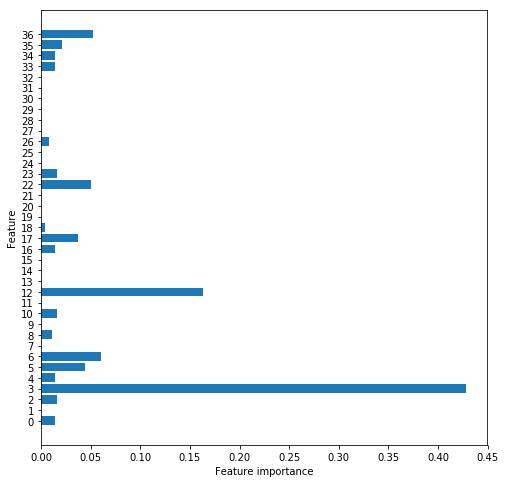

In [54]:
tree_clf = DecisionTreeClassifier(criterion = "gini", max_depth = 5) 
tree_clf.fit(scaled_data_train, y_train)
# roc(tree_clf,scaled_data_train,scaled_data_test,y_train,y_test,n_classes)
plot_feature_importances(tree_clf, pd.DataFrame(scaled_data_train))
print_metrics(y_pred,y_test)

#### With Selected Feautres:

Precision Score: [0.56043956 0.55555556 0.73366834]
Recall Score: [0.73913043 0.46153846 0.6952381 ]
Accuracy Score: 0.6598837209302325
F1 Score: [0.6375     0.50420168 0.71393643]


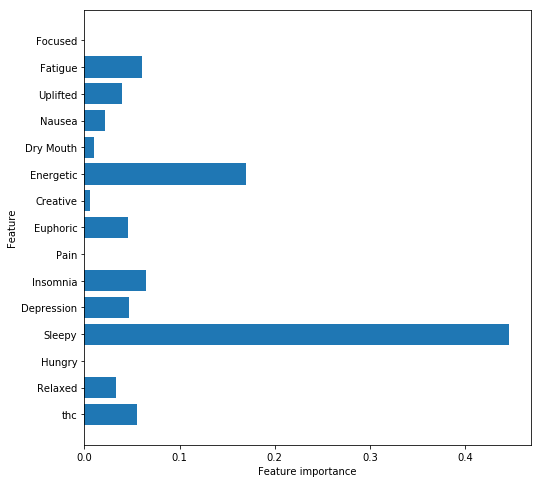

In [55]:
tree_clf = DecisionTreeClassifier(criterion = "gini", max_depth = 5) 
tree_clf.fit(df_train, y_train)
# roc(tree_clf,df_train,df_test,y_train,y_test,n_classes)
plot_feature_importances(tree_clf, df_train)
print_metrics(y_pred,y_test)

### With PCA

Precision Score: [0.15384615 0.01851852 0.86432161]
Recall Score: [0.31111111 0.33333333 0.58108108]
Accuracy Score: 0.5436046511627907
F1 Score: [0.20588235 0.03508772 0.69494949]


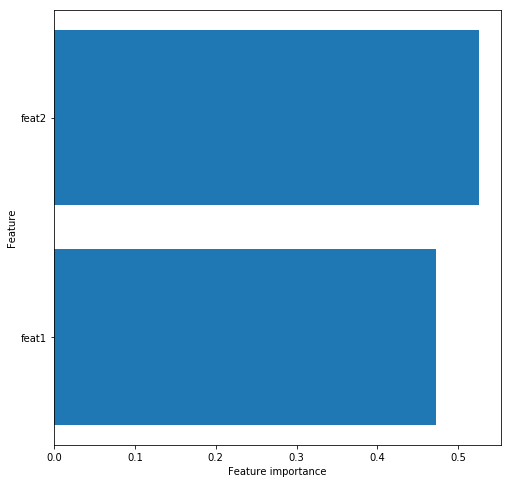

In [172]:
tree_clf = DecisionTreeClassifier(criterion = "gini", max_depth = 5) 
tree_clf.fit(Xptrain, yptrain)
# roc(tree_clf,df_train,df_test,y_train,y_test,n_classes)
plot_feature_importances(tree_clf, Xptrain)
print_metrics(y_pred,yptest)

In [56]:
#How to with multilabel-indicator????
# pred = tree_clf.predict(X_test)
# print(confusion_matrix(y_test, pred))
# print(classification_report(X_test, pred))

# acc = accuracy_score(y_test,y_pred)
# print("Accuracy is: {}".format(acc))

### Forest

In [57]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(scaled_data_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [58]:
train_score=forest.score(scaled_data_train,y_train)
test_score=forest.score(scaled_data_test,y_test)
print('Training Score: {}'.format(train_score))
print('Testing Score: {}'.format(test_score))

Training Score: 0.6912621359223301
Testing Score: 0.6744186046511628


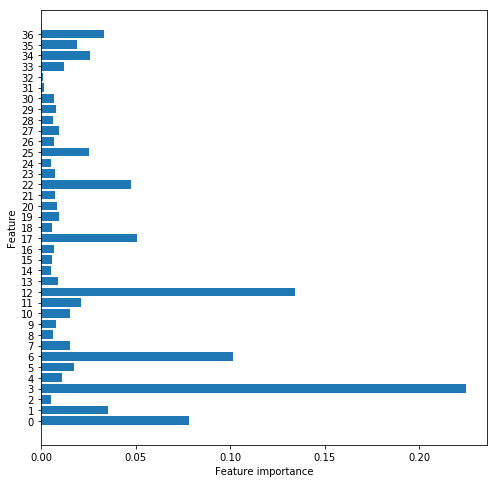

In [59]:
plot_feature_importances(forest,pd.DataFrame(scaled_data_train))

### For Selected Features:

In [60]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(df_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [61]:
train_score=forest.score(df_train,y_train)
test_score=forest.score(df_test,y_test)
print('Training Score: {}'.format(train_score))
print('Testing Score: {}'.format(test_score))

Training Score: 0.6737864077669903
Testing Score: 0.6686046511627907


### With PCA

In [173]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(Xptrain, yptrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [175]:
train_score=forest.score(Xptrain,yptrain)
test_score=forest.score(df_test,yptest)
print('Training Score: {}'.format(train_score))
print('Testing Score: {}'.format(test_score))

ValueError: Number of features of the model must match the input. Model n_features is 2 and input n_features is 15 

## Forest with n_Est=5, max_feat=10, and max_depth=2

In [62]:
forest_2 = RandomForestClassifier(n_estimators = 5, max_features= 10, max_depth= 2)
forest_2.fit(scaled_data_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [63]:
print("Training Score: ",forest_2.score(scaled_data_train,y_train))
print("Testing Score: ",forest_2.score(scaled_data_test,y_test))

Training Score:  0.616504854368932
Testing Score:  0.6656976744186046


### With Selected Features:

In [64]:
forest_2 = RandomForestClassifier(n_estimators = 5, max_features= 10, max_depth= 2)
forest_2.fit(df_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [65]:
print("Training Score: ",forest_2.score(df_train,y_train))
print("Testing Score: ",forest_2.score(df_test,y_test))

Training Score:  0.5922330097087378
Testing Score:  0.6453488372093024


## Grid Search Forest All Data

In [78]:
dt_clf=RandomForestClassifier()
dt_cv_score=cross_val_score(dt_clf, scaled_data_train, y_train)
meandtcv=dt_cv_score.mean()
print("Mean Cross Validation Score: {:.4}%".format(meandtcv * 100))

Mean Cross Validation Score: 57.87%


In [81]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators':[1,2,3,4,5,6,7,8,9],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

In [82]:
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=10, return_train_score=True)
dt_grid_search.fit(scaled_data_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'max_depth': [None, 2, 3, 4, 5, 6], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [83]:
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(scaled_data_test, y_test)

print("Mean Training Score: {:.4}%".format(dt_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(dt_gs_testing_score * 100))
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 66.0%
Mean Testing Score: 67.44%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 9}

In [84]:
forest3 = RandomForestClassifier(criterion='gini', max_depth=None,min_samples_leaf=4,min_samples_split=5,n_estimators=9)
forest3.fit(scaled_data_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [85]:
y_pred=forest3.predict(scaled_data_test)
print_metrics(y_test,y_pred)

Precision Score: [0.67164179 0.57142857 0.67355372]
Recall Score: [0.49450549 0.37037037 0.81909548]
Accuracy Score: 0.6627906976744186
F1 Score: [0.56962025 0.4494382  0.73922902]


In [86]:
print("Training Score: ",forest3.score(scaled_data_train,y_train))
print("Testing Score: ",forest3.score(scaled_data_test,y_test))

Training Score:  0.7631067961165049
Testing Score:  0.6627906976744186


#### Grid Search Forest Selected

In [105]:
dt_clf=RandomForestClassifier()
dt_cv_score=cross_val_score(dt_clf, df_train, y_train)
meandtcv=dt_cv_score.mean()
print("Mean Cross Validation Score: {:.4}%".format(meandtcv * 100))
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=10, return_train_score=True)
dt_grid_search.fit(df_train, y_train)

Mean Cross Validation Score: 55.25%


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'max_depth': [None, 2, 3, 4, 5, 6], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [106]:
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(df_test, y_test)

print("Mean Training Score: {:.4}%".format(dt_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(dt_gs_testing_score * 100))
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 65.36%
Mean Testing Score: 61.63%
Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 5}

In [107]:
forest3 = RandomForestClassifier(criterion='entropy', max_depth=4,min_samples_leaf=3,min_samples_split=2,n_estimators=5)
forest3.fit(scaled_data_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [108]:
y_pred=forest3.predict(scaled_data_test)
print_metrics(y_test,y_pred)

Precision Score: [0.70422535 0.48717949 0.67521368]
Recall Score: [0.54945055 0.35185185 0.79396985]
Accuracy Score: 0.6598837209302325
F1 Score: [0.61728395 0.40860215 0.72979215]


In [109]:
print("Training Score: ",forest3.score(scaled_data_train,y_train))
print("Testing Score: ",forest3.score(scaled_data_test,y_test))

Training Score:  0.6495145631067961
Testing Score:  0.6598837209302325


## SVM

In [92]:
clf = svm.SVC(kernel='linear')
clf.fit(scaled_data_train, y_train)
clf.predict(scaled_data_test)

array([0, 2, 2, 0, 2, 2, 0, 2, 1, 2, 0, 1, 1, 2, 1, 0, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 2,
       2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1,
       0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 1, 2, 0, 2, 2, 0, 1, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 1, 0, 0, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2,
       2, 0, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 2, 2, 0, 1, 2, 2, 2,
       2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2, 0, 1, 2, 2,
       0, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 0, 0, 2, 2, 2, 2, 1, 0, 1, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,

## Naive Bayes

In [94]:
from sklearn.naive_bayes import BernoulliNB
clf=BernoulliNB()
clf.fit(scaled_data_train, y_train)
clf.predict(scaled_data_test)

array([0, 2, 1, 0, 0, 1, 0, 2, 1, 2, 0, 1, 1, 2, 1, 0, 2, 2, 2, 0, 2, 0,
       1, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 2,
       2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 1,
       0, 2, 2, 2, 2, 1, 1, 1, 0, 1, 1, 2, 0, 0, 2, 0, 1, 2, 2, 0, 1, 0,
       0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 0, 1, 2, 2, 2,
       2, 1, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2,
       2, 0, 1, 2, 2, 2, 1, 1, 2, 0, 2, 1, 0, 2, 0, 0, 1, 1, 1, 2, 1, 2,
       0, 2, 1, 2, 2, 0, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       0, 0, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 1, 0, 2, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 1, 0, 2, 0, 1, 2, 2,
       0, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       1, 0, 2, 2, 1, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1,

In [95]:
clf=GaussianNB()
clf.fit(scaled_data_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [96]:
def predict_class(obs_row, how='bands', range_width_std=.25):
    c_probs = []
    for c in range(2):
        p = len(y_train[y_train==c])/len(y_train) #Initialize probability to relative probability of class
        for feature in scaled_data_train.columns:
            if how == 'bands':
                p *= p_band_x_given_class(obs_row, feature, c, range_width_std=range_width_std)
            else:
                p *= p_x_given_class(obs_row, feature, c)
        c_probs.append(p)
    return np.argmax(c_probs)

In [97]:
scaled_data_train=pd.DataFrame(scaled_data_train)
scaled_data_test=pd.DataFrame(scaled_data_test)

## Adaboost

In [98]:
clfa=AdaBoostClassifier()
clfa.fit(scaled_data_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [99]:
adaboost_train_preds = clfa.predict(scaled_data_train)
adaboost_test_preds = clfa.predict(scaled_data_test)

In [100]:
confusion_matrix(y_test,adaboost_test_preds)

array([[ 53,   1,  37],
       [  1,  21,  32],
       [ 35,  32, 132]])

In [101]:
print(classification_report(y_test, adaboost_test_preds))

              precision    recall  f1-score   support

           0       0.60      0.58      0.59        91
           1       0.39      0.39      0.39        54
           2       0.66      0.66      0.66       199

   micro avg       0.60      0.60      0.60       344
   macro avg       0.55      0.54      0.55       344
weighted avg       0.60      0.60      0.60       344

